**Импорт необходимых методов и библиотек, настроек:**

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import plot
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)

**Подготовка данных:**

In [14]:
df = pd.read_csv('/content/time_messagees.txt', names=['Time', 'Value'], index_col='Time')
df['Time'] = np.arange(len(df.index))# создание столбца с временным шагом
X = df.loc[:,['Time']]  # features - Признаки
y = df.loc[:,'Value'] # targets - Целевые значения

**Создание модели и вывод MSE:**

In [15]:
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)# pd.series - для того чтобы сохранить предсказанные значения относительно времени
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 365.3979914140091


**Построение графика:**

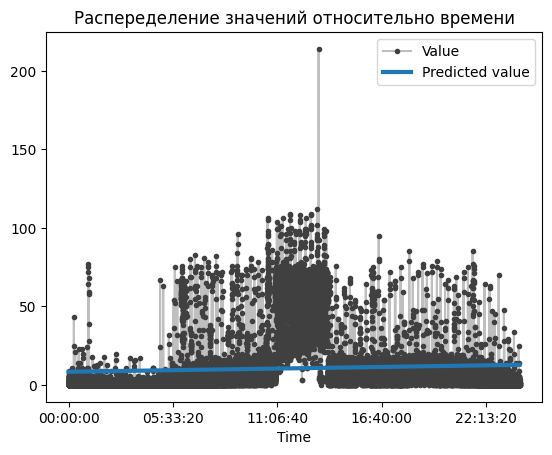

In [16]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax,label ='Predicted value',linewidth=3, legend = True)
ax.set_title('Распеределение значений относительно времени');

**Вывод:**

Модель совершает заметные ошибки в предсказаниях. Возможно, ей трудно адаптироваться к вариативности данных в данном диапазоне, требуется более сложная модель.

# * Дополнительное задание
> Реализовать модель **линейной регрессии** самостоятельно - не используя библиотек. Сравнить графики результатов такого подхода и реализации **scikit-learn**.

Для построения модели **линейной регрессии** использовался **метод наименьших квадратов**(МНК).
Формула по которой считаются коэффициенты:

image.png , где

image.png - псевдообратная матрица, которая используется в решении систем линейных уравнений

image.png - Цели

Mean Squared Error : 365.39799141400914


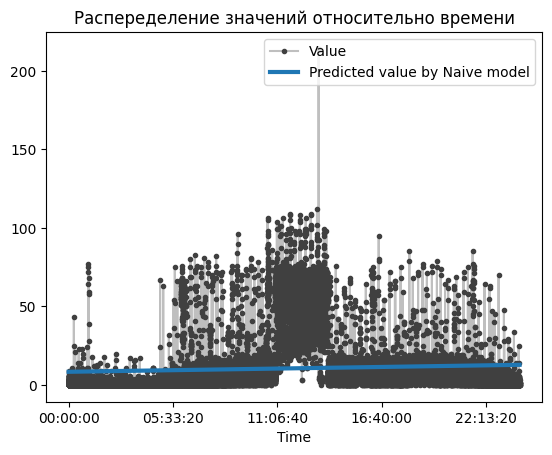

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import plot
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)
class LinearRegressionNaive:
    def __init__(self):
        self.w = None
        self.bias = None

    def fit(self, X, y):
        f_matr = np.column_stack((np.ones(len(X)), X)) #Матрица признаков

        self.w = (np.linalg.inv(f_matr.T @ f_matr) @ f_matr.T @ y) # считаем коэффициенты модели, решение линейной системы уравнений X⋅w=y может быть найдено по формуле w = (X^T * X)^-1 * X^T * y,
                                                                    #где X матрица признаков, w-вектор коэффициентов,y - вектор целевых значений
        self.bias = self.w[0]
        self.w = self.w[1:]

    def predict(self, X):
        return self.bias + X @ self.w

df = pd.read_csv('/content/time_messagees.txt', names=['Time', 'Value'], index_col='Time')
df['Time'] = np.arange(len(df.index))
X = df.loc[:, ['Time']]
y = df.loc[:, 'Value']

Naive_model = LinearRegressionNaive()
Naive_model.fit(X, y)

y_pred = Naive_model.predict(X)

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error : {mse}')

ax = df['Value'].plot(**plot_params)
ax.plot(df.index, y_pred, label='Predicted value by Naive model', linewidth=3)
ax.set_title('Распеределение значений относительно времени')
ax.legend()


**Вывод:**

Значения MSE для линейных регрессионных моделей, построенных с использованием библиотеки scikit-learn и реализованных самостоятельно, похожи, это указывает на то, что оба метода успешно выполнили задачу линейной регрессии для данного набора данных.

Одинаковое значение MSE может свидетельствует о том, что оба метода предсказывают те же самые отклонения от фактических значений.